In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

k=1: Accuracy = 100.00%


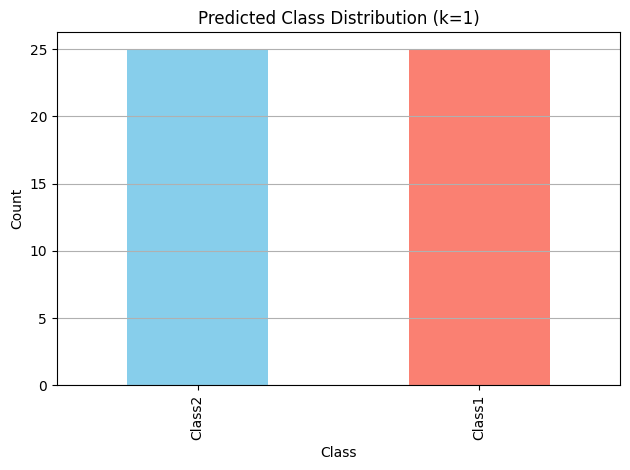

k=2: Accuracy = 100.00%


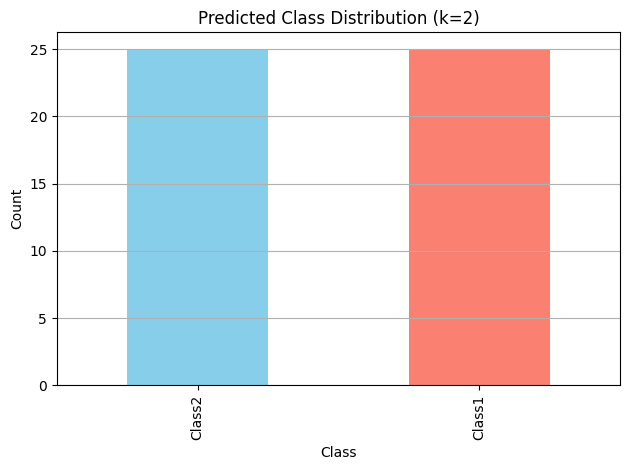

k=3: Accuracy = 98.00%


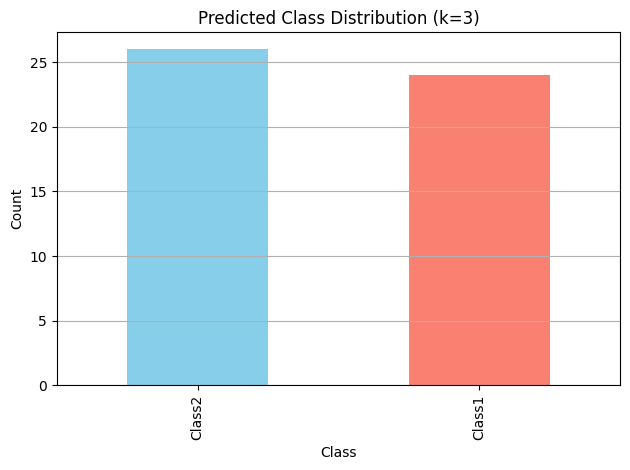

k=4: Accuracy = 98.00%


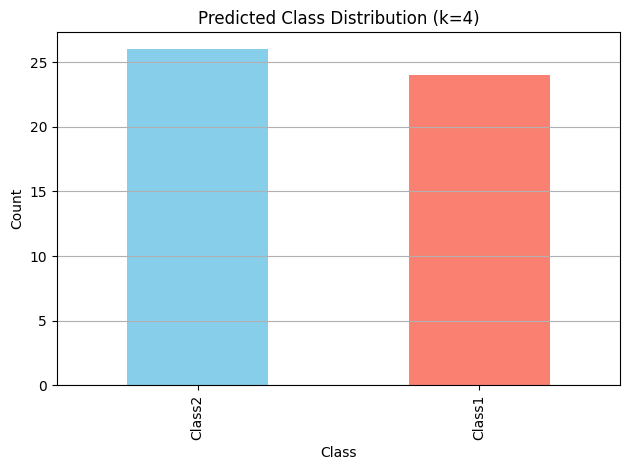

k=5: Accuracy = 98.00%


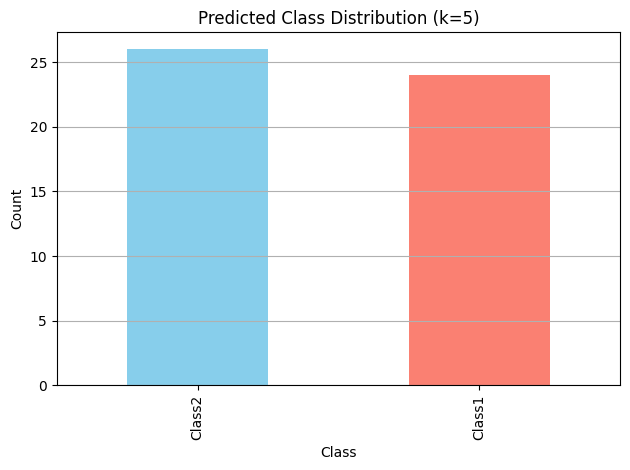

k=20: Accuracy = 98.00%


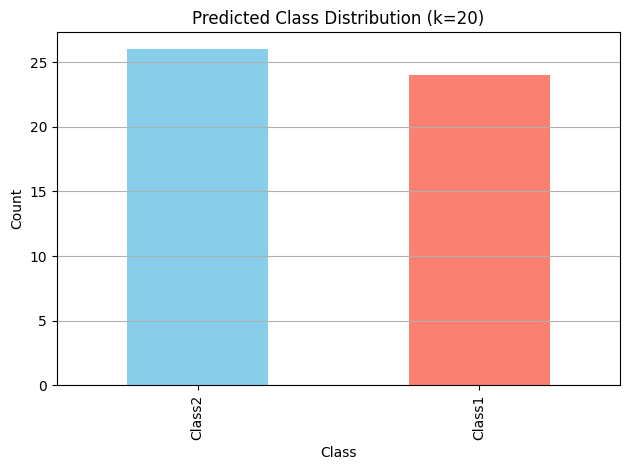

k=30: Accuracy = 100.00%


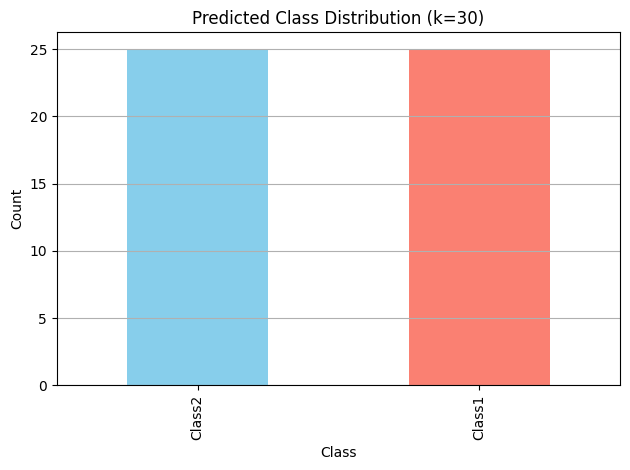

In [17]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate 100 random values
np.random.seed(42)
values = np.random.rand(100)

# Label first 50 values
labels = ['Class1' if v <= 0.5 else 'Class2' for v in values[:50]]
labels += [None] * 50  # Unlabeled remaining 50

# Create DataFrame
df = pd.DataFrame({
    'Value': values,
    'Label': labels
})

# Prepare training and test data
X_train = df[df['Label'].notna()][['Value']]
y_train = df[df['Label'].notna()]['Label']
X_test = df[df['Label'].isna()][['Value']]
y_true = ['Class1' if x <= 0.5 else 'Class2' for x in values[50:]]

# Perform KNN for various k
k_values = [1, 2, 3, 4, 5, 20, 30]
accuracies = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_true, preds) * 100
    accuracies[k] = acc
    print(f"k={k}: Accuracy = {acc:.2f}%")

    # Plot predicted class distribution
    plt.figure()
    pd.Series(preds).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Predicted Class Distribution (k={k})')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
